In [1]:
import pandas as pd
import sympy as sp
import numpy as np
from IPython.display import display, Math
np.set_printoptions(precision=3)

In [2]:
# Define the matrix B
B = np.array([
    [2, -1, 0, 0],
    [-1, 2, -1, 0],
    [0, -1, 2, -1],
    [0, 0, -1, 2]
])

# Compute the Cholesky decomposition of B
L = np.linalg.cholesky(B)
cholesky_decomposition = L

Brepr = sp.Matrix(np.round(cholesky_decomposition,3))
latex_code = sp.latex(Brepr)

display(Math(latex_code))

<IPython.core.display.Math object>

In [3]:
# Define L with an additional column of zeros
L_extended = np.hstack([L, np.zeros((4,1))])
display(Math(sp.latex(sp.Matrix(np.round(L_extended,3)))))
# Compute LL^T
LLT = L_extended @ L_extended.T
LLT


<IPython.core.display.Math object>

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [4]:
# Define symbols
rho = sp.symbols('rho')

# Define the matrices M and S
M = sp.Matrix([[1, 1], [1, -1]])
S = sp.Matrix([[1, rho], [rho, 1]])

# Compute MSM^T
MS = M * S
MSMT = MS * M.T
MSMT

Matrix([
[2*rho + 2,         0],
[        0, 2 - 2*rho]])

In [7]:
# Define the matrix
correlation_matrix = sp.Matrix([
    [1, 0.8, -0.8],
    [0.8, 1, rho],
    [-0.8, rho, 1]
])

# Calculate the determinant using sympy
determinant_sympy = correlation_matrix.det()
determinant_sympy.simplify()

inequality = determinant_sympy >= 0
solutions_for_inequality = sp.solveset(inequality, rho, domain=sp.S.Reals)
solutions_for_inequality

Interval(-1.00000000000000, -0.280000000000000)

In [8]:
# Define the matrix
correlation_matrix = sp.Matrix([
    [1, 0.4, -0.4],
    [0.4, 1, rho],
    [-0.4, rho, 1]
])

# Calculate the determinant using sympy
determinant_sympy = correlation_matrix.det()
determinant_sympy.simplify()

inequality = determinant_sympy >= 0
solutions_for_inequality = sp.solveset(inequality, rho, domain=sp.S.Reals)
solutions_for_inequality

Interval(-1.00000000000000, 0.680000000000000)

In [ ]:
def general_rho_range(n, i, j, known_rhos):
    # Define the unknown correlation symbol
    rho_unknown = sp.symbols('rho_unknown')
    
    # Create an n x n matrix filled with 1 on the diagonal and symbols for the correlations
    matrix = sp.Matrix(n, n, lambda x, y: 1 if x == y else sp.symbols(f'rho_{x+1}_{y+1}'))
    
    # Fill known values
    for (k, l), value in known_rhos.items():
        matrix[k, l] = matrix[l, k] = value

    # Place the unknown at the specified position (adjust for zero-index)
    matrix[i, j] = matrix[j, i] = rho_unknown
    
    # Calculate the determinant of the matrix
    det = matrix.det()
    
    # Isolate the quadratic equation in terms of the unknown rho
    coeffs = det.as_poly(rho_unknown).all_coeffs()
    
    # Extract coefficients for quadratic formula
    a, b, c = coeffs  # Note: this assumes that the determinant is quadratic in rho_unknown
    
    # Calculate the discriminant
    discriminant = b**2 - 4*a*c
    
    # Check if the discriminant is non-negative for real roots
    if discriminant >= 0:
        # Calculate the roots using the quadratic formula
        root1 = (-b + sp.sqrt(discriminant)) / (2*a)
        root2 = (-b - sp.sqrt(discriminant)) / (2*a)
        return (sp.N(root1, 3), sp.N(root2, 3))  # Return numerical approximations
    else:
        return "No real solutions for rho_unknown"  # When discriminant is negative


In [ ]:
rho, x = sp.symbols('rho x')

correlation_matrix_scaled_new = sp.Matrix([
    [1, rho, 4 * x, -2 * x],
    [rho, 1, 2 * x, -3 * x],
    [4 * x, 2 * x, 1, -2 * x],
    [-2 * x, -3 * x, -2 * x, 1]
])

det_scaled_new = correlation_matrix_scaled_new.det()

simplified_det_scaled_new = sp.simplify(det_scaled_new)
det_evaluated = simplified_det_scaled_new.subs(x, 0.1)
det_evaluated = sp.simplify(det_evaluated)
rho_solutions = sp.solveset(sp.Gt(det_evaluated, 0), rho, domain=sp.S.Reals)
rho_solutions


Interval.open(-0.744183284534022, 0.969183284534022)

In [3]:
# Define the two 3x3 matrices
matrix_1 = sp.Matrix([
    [1, rho, 0.4],
    [rho, 1, 0.2],
    [0.4, 0.2, 1]
])

matrix_2 = sp.Matrix([
    [1, rho, -0.2],
    [rho, 1, -0.3],
    [-0.2, -0.3, 1]
])

# Compute the determinants of these matrices
det_matrix_1 = matrix_1.det()
det_matrix_2 = matrix_2.det()

# Simplify the determinants
simplified_det_matrix_1 = sp.simplify(det_matrix_1)
simplified_det_matrix_2 = sp.simplify(det_matrix_2)

solutions_matrix_1 = sp.solveset(sp.Gt(simplified_det_matrix_1, 0), rho, domain=sp.S.Reals)
solutions_matrix_2 = sp.solveset(sp.Gt(simplified_det_matrix_2, 0), rho, domain=sp.S.Reals)

solutions_matrix_1, solutions_matrix_2

(Interval.open(-0.817997772825746, 0.977997772825746),
 Interval.open(-0.874665715643834, 0.994665715643834))

In [11]:
import numpy as np

matrix = np.array([
    [1, 0.2, 0.3],
    [0.2, 1, -0.2],
    [0.3, -0.2, 1]
])

np.linalg.cholesky(matrix)


array([[ 1.   ,  0.   ,  0.   ],
       [ 0.2  ,  0.98 ,  0.   ],
       [ 0.3  , -0.265,  0.916]])

In [9]:
# Convert numpy array to a sympy matrix
cholesky_factor_sympy = sp.Matrix(cholesky_factor)

# Generate LaTeX code for the matrix
cholesky_factor_latex = sp.latex(cholesky_factor_sympy)
print(cholesky_factor_latex)

\left[\begin{matrix}1.0 & 0.0 & 0.0\\0.2 & 0.979795897113271 & 0.0\\0.3 & -0.265361388801511 & 0.916287800493564\end{matrix}\right]


In [ ]:
import pandas as pd
import numpy as np

# Discount factors and corresponding months
discount_factors = [-1, 0.9983, 0.9935, 0.9829, 0.9775, 0.9517, 0.9479]
months = [1/30, 1, 4, 10, 13, 20, 22]

# Convert months to years
years = [m / 12 for m in months]

# Add the overnight rate
overnight_rate_annual = 0.0075
overnight_period_years = 1 / 365

# Correcting the discount factor for overnight
discount_factors[0] = np.exp(-overnight_rate_annual * overnight_period_years)

# Calculate zero rates again including the overnight rate
zero_rates = [-np.log(df) / t for df, t in zip(discount_factors, years)]
zero_rates[0] = 0.75

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Months": months,
    "Discount Factor": discount_factors,
    "Zero Rate (%)": [z * 100 for z in zero_rates]  # Convert to percentage
})

results_df["Months"] = results_df["Months"].round(decimals=0).astype(int)
print(results_df.to_latex(escape=True, index=False))


\begin{tabular}{rrr}
\toprule
Months & Discount Factor & Zero Rate (\%) \\
\midrule
0 & 0.999979 & 0.739726 \\
1 & 0.998300 & 2.041736 \\
4 & 0.993500 & 1.956365 \\
10 & 0.982900 & 2.069747 \\
13 & 0.977500 & 2.100645 \\
20 & 0.951700 & 2.970325 \\
22 & 0.947900 & 2.918524 \\
\bottomrule
\end{tabular}



In [63]:
# Redefine the interpolation nodes (months) and values (zero rates) including all nodes up to 22 months
x_i = [0, 1, 4, 10, 13, 20, 22]  # months
v_i = [0.0075, 0.02042, 0.01956, 0.02070, 0.02101, 0.02970, 0.02919]  # corrected zero rates in decimal

# Number of nodes
n = len(x_i)-1
print(n, "=n")

# Initialize M and z with zeros
M = np.zeros((n, n))
z = np.zeros(n)

# Recompute vector z
for i in range(1, n):
    z[i] = 6 * ((v_i[i+1] - v_i[i]) / (x_i[i+1] - x_i[i]) - (v_i[i] - v_i[i-1]) / (x_i[i] - x_i[i-1]))

# Compute tridiagonal matrix M
for i in range(1, n):
    M[i, i] = 2 * (x_i[i+1] - x_i[i-1])
for i in range(1, n-1):
    M[i, i+1] = x_i[i+1] - x_i[i]
for i in range(2, n):
    M[i, i-1] = x_i[i] - x_i[i-1]

# Print M and z for inspection
M, z


6 =n


(array([[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8.,  3.,  0.,  0.,  0.],
        [ 0.,  3., 18.,  6.,  0.,  0.],
        [ 0.,  0.,  6., 18.,  3.,  0.],
        [ 0.,  0.,  0.,  3., 20.,  7.],
        [ 0.,  0.,  0.,  0.,  7., 18.]]),
 array([ 0.        , -0.07924   ,  0.00286   , -0.00052   ,  0.00682857,
        -0.00897857]))

In [65]:
# Shift the matrix M and vector z to form M' and z'
M_prime = M[1:, 1:]  # Remove the first and last row and column
z_prime = z[1:]        # Remove the first and last element



# Print M' and z' for inspection
M_prime, z_prime

(array([[ 8.,  3.,  0.,  0.,  0.],
        [ 3., 18.,  6.,  0.,  0.],
        [ 0.,  6., 18.,  3.,  0.],
        [ 0.,  0.,  3., 20.,  7.],
        [ 0.,  0.,  0.,  7., 18.]]),
 array([-0.07924   ,  0.00286   , -0.00052   ,  0.00682857, -0.00897857]))

In [66]:
from sympy import Matrix, init_printing

# Initialize LaTeX printing
init_printing()

# Convert arrays to sympy Matrices
M_prime_sympy = Matrix(M_prime)
z_prime_sympy = Matrix(z_prime)

# Display the matrix and vector in LaTeX
M_prime_sympy

⎡8.0  3.0   0.0   0.0   0.0 ⎤
⎢                           ⎥
⎢3.0  18.0  6.0   0.0   0.0 ⎥
⎢                           ⎥
⎢0.0  6.0   18.0  3.0   0.0 ⎥
⎢                           ⎥
⎢0.0  0.0   3.0   20.0  7.0 ⎥
⎢                           ⎥
⎣0.0  0.0   0.0   7.0   18.0⎦

In [67]:
z_prime_sympy

⎡      -0.07924       ⎤
⎢                     ⎥
⎢       0.00286       ⎥
⎢                     ⎥
⎢-0.000519999999999996⎥
⎢                     ⎥
⎢ 0.00682857142857143 ⎥
⎢                     ⎥
⎣-0.00897857142857143 ⎦

In [68]:
from numpy.linalg import cholesky, solve

# Perform Cholesky decomposition on the symmetric positive definite matrix M'
L = cholesky(M_prime)

# Solve the equation using the Cholesky factor L
# Solve L*y = z' for y (forward substitution)
y = solve(L, z_prime)

# Solve L.T*w = y for w (backward substitution)
w_cholesky = solve(L.T, y)

Matrix(w_cholesky)

⎡ -0.0107496097909466 ⎤
⎢                     ⎥
⎢ 0.00225229277585762 ⎥
⎢                     ⎥
⎢-0.000905406765432886⎥
⎢                     ⎥
⎢0.000754521707548751 ⎥
⎢                     ⎥
⎣-0.000792234632300705⎦

In [69]:
# Expand w' into w by adding zeros at the beginning and end
w_full = np.concatenate(([0], w_cholesky, [0]))
w_full


array([ 0.        , -0.01074961,  0.00225229, -0.00090541,  0.00075452,
       -0.00079223,  0.        ])

In [70]:
# Recalculate c_i with the corrected formula and prepend zero
c_i_final = [0] + [(w_full[i-1] * x_i[i] - w_full[i] * x_i[i-1]) / (2 * (x_i[i] - x_i[i-1])) for i in range(1, n+1)]

# Recalculate d_i with the corrected formula and prepend zero
d_i_final = [0] + [(w_full[i] - w_full[i-1]) / (6 * (x_i[i] - x_i[i-1])) for i in range(1, n+1)]

Matrix(c_i_final)


⎡         0          ⎤
⎢                    ⎥
⎢        0.0         ⎥
⎢                    ⎥
⎢-0.00754178865660734⎥
⎢                    ⎥
⎢0.00217871290169231 ⎥
⎢                    ⎥
⎢-0.00321925083768584⎥
⎢                    ⎥
⎢ 0.0018135345979203 ⎥
⎢                    ⎥
⎣-0.00435729047765388⎦

In [54]:
Matrix(d_i_final)

⎡         0          ⎤
⎢                    ⎥
⎢-0.00179160163182443⎥
⎢                    ⎥
⎢0.000722327920378012⎥
⎢                    ⎥
⎢-8.77138761469585e-5⎥
⎢                    ⎥
⎢9.22182484989798e-5 ⎥
⎢                    ⎥
⎢-3.68275319011775e-5⎥
⎢                    ⎥
⎣6.60195526917254e-5 ⎦

In [71]:
# Calculate q_i-1 and r_i with r_0 set to zero
q_i = [v_i[i-1] - c_i_final[i] * x_i[i-1]**2 - d_i_final[i] * x_i[i-1]**3 for i in range(1, n+1)]
r_i = [0] + [v_i[i] - c_i_final[i] * x_i[i]**2 - d_i_final[i] * x_i[i]**3 for i in range(1, n+1)]

Matrix(q_i)


⎡       0.0075       ⎤
⎢                    ⎥
⎢ 0.0272394607362293 ⎥
⎢                    ⎥
⎢-0.00968571835367163⎥
⎢                    ⎥
⎢ 0.250406835269604  ⎥
⎢                    ⎥
⎢ -0.204567259461643 ⎥
⎢                    ⎥
⎣  1.24445976952775  ⎦

In [72]:
Matrix(r_i)

⎡        0         ⎤
⎢                  ⎥
⎢0.0222116016318244⎥
⎢                  ⎥
⎢0.0939996316015246⎥
⎢                  ⎥
⎢-0.109457414022273⎥
⎢                  ⎥
⎢0.362459899616648 ⎥
⎢                  ⎥
⎢-0.401093583958699⎥
⎢                  ⎥
⎣ 1.43514239412298 ⎦

In [73]:
# Calculate a_i and b_i using the provided formulas
a_i = [0] + [(q_i[i-1] * x_i[i] - r_i[i] * x_i[i-1]) / (x_i[i] - x_i[i-1]) for i in range(1, n+1)]
b_i = [0] + [(r_i[i] - q_i[i-1]) / (x_i[i] - x_i[i-1]) for i in range(1, n+1)]

Matrix(a_i)


⎡         0         ⎤
⎢                   ⎥
⎢      0.0075       ⎥
⎢                   ⎥
⎢0.00498607044779756⎥
⎢                   ⎥
⎢0.0568287454253957 ⎥
⎢                   ⎥
⎢-0.123103379220543 ⎥
⎢                   ⎥
⎢ 0.160410200318603 ⎥
⎢                   ⎥
⎣-0.662366476424619 ⎦

In [74]:
Matrix(b_i)

⎡         0         ⎤
⎢                   ⎥
⎢0.0147116016318244 ⎥
⎢                   ⎥
⎢0.0222533902884318 ⎥
⎢                   ⎥
⎢-0.0166286159447668⎥
⎢                   ⎥
⎢0.0373510214490147 ⎥
⎢                   ⎥
⎢-0.0280751892138651⎥
⎢                   ⎥
⎣0.0953413122976183 ⎦

In [75]:
def f(x):
    # Define the conditions for choosing the correct segment function based on x
    if 0 <= x < 1:
        i = 1
    elif 1 <= x < 4:
        i = 2
    elif 4 <= x < 10:
        i = 3
    elif 10 <= x < 13:
        i = 4
    elif 13 <= x < 20:
        i = 5
    elif 20 <= x <= 22:
        i = 6
    else:
        return None  # x is outside the defined intervals
    
    # Calculate the spline function for the appropriate segment
    return (a_i[i] + b_i[i] * x +
            c_i_final[i] * x**2 +  # +1 to adjust indexing for c and d
            d_i_final[i] * x**3)

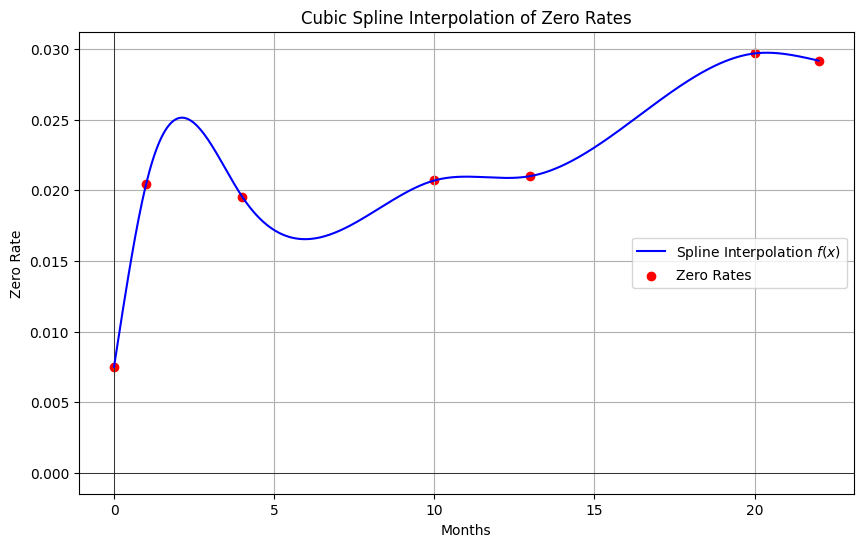

In [80]:
import matplotlib.pyplot as plt

# Define the range of x values for plotting
x_values = np.linspace(0, 22, 400)
# Compute f(x) for each x in the range
f_values = [f(x) for x in x_values]

# Plotting f(x)
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.plot(x_values, f_values, label='Spline Interpolation $f(x)$', color='blue')

# Also plot the original zero rates at their respective months
plt.scatter(x_i, v_i, color='red', label='Zero Rates')

# Adding labels and legend
plt.title('Cubic Spline Interpolation of Zero Rates')
plt.xlabel('Months')
plt.ylabel('Zero Rate')
plt.legend()
plt.grid(True)
plt.savefig("interp.pdf")



In [87]:
[print(f(x)) for x in [3,9,15,21]]

0.023372997253833155
0.01970353124843867
0.02303472647621932
0.02964305865807515


[None, None, None, None]

In [ ]:
semiannual_coupon_rate = 0.035
face_value = 100

# Compute the zero rates for each coupon payment month using the function f(x)
zero_rates_at_payments = [f(month) for month in [3, 9, 15, 21]]

# Calculate the present values of the coupons and the face value using the respective zero rates
updated_coupons_pv_with_zero_rates = [
    semiannual_coupon_rate * face_value / ((1 + zero_rate)**(month / 12)) for zero_rate, month in zip(zero_rates_at_payments[:-1], [3, 9, 15])
]
updated_face_value_pv_with_zero_rates = (
    (face_value + semiannual_coupon_rate * face_value) / ((1 + zero_rates_at_payments[-1])**((21) / 12))
)

# Updating the DataFrame to include months and zero rates
updated_payments_df_with_zero_rates = pd.DataFrame({
    "Month": [3, 9, 15, 21],
    "Time (years)": [0.25, 0.75, 1.25, 1.75],
    "Zero Rate": zero_rates_at_payments,
    "Cash Flow": [semiannual_coupon_rate * face_value] * 3 + [face_value + semiannual_coupon_rate * face_value],
    "Discounted Cash Flow": updated_coupons_pv_with_zero_rates + [updated_face_value_pv_with_zero_rates]
})

updated_payments_df_with_zero_rates


,Month,Time (years),Zero Rate,Cash Flow,Discounted Cash Flow
0,3,0.25,0.023373,3.5,3.479842
1,9,0.75,0.019704,3.5,3.449154
2,15,1.25,0.023035,3.5,3.401771
3,21,1.75,0.029643,103.5,98.341908


In [92]:
# Recompute the zero rates for each coupon payment month using the function f(x)
zero_rates_at_payments = [f(month) for month in [3, 9, 15, 21]]

# Recalculate discount factors using continuous compounding based on the new zero rates
discount_factors = [np.exp(-rate * time) for rate, time in zip(zero_rates_at_payments, [0.25, 0.75, 1.25, 1.75])]

# Define semiannual coupon payments and the final cash flow including the face value
coupon_payments = [semiannual_coupon_rate * face_value / 2] * 3  # Semiannual coupon rate
final_payment = face_value + (semiannual_coupon_rate * face_value / 2)  # Final payment includes last coupon

# Calculate the discounted cash flows
discounted_cash_flows = [
    payment * df for payment, df in zip(coupon_payments + [final_payment], discount_factors)
]

# Creating DataFrame to display results
payment_schedule_df = pd.DataFrame({
    "Month": [3, 9, 15, 21],
    "Zero Rate": zero_rates_at_payments,
    "Cash Flow": coupon_payments + [final_payment],
    "Discount Factor": discount_factors,
    "Discounted Cash Flow": discounted_cash_flows
})

print(payment_schedule_df.to_latex(index=False))


\begin{tabular}{rrrrr}
\toprule
Month & Zero Rate & Cash Flow & Discount Factor & Discounted Cash Flow \\
\midrule
3 & 0.023373 & 1.750000 & 0.994174 & 1.739804 \\
9 & 0.019704 & 1.750000 & 0.985331 & 1.724329 \\
15 & 0.023035 & 1.750000 & 0.971617 & 1.700330 \\
21 & 0.029643 & 101.750000 & 0.949447 & 96.606253 \\
\bottomrule
\end{tabular}



In [91]:
payment_schedule_df["Discounted Cash Flow"].sum()

In [93]:
# Define the vectors as columns of a matrix
A = np.array([
    [0.25, -0.50, 1.50],
    [1, -1, 1.25],
    [-0.50, -0.25, 2],
    [0, 0.50, 0.75],
    [-1, 0.75, 1.50]
])

# Calculate the rank of the matrix
rank_A = np.linalg.matrix_rank(A)

# Check if the rank equals the number of vectors (columns)
linear_independence = rank_A == 3
rank_A, linear_independence


(3, True)

In [94]:
Matrix(A)

⎡0.25  -0.5   1.5 ⎤
⎢                 ⎥
⎢1.0   -1.0   1.25⎥
⎢                 ⎥
⎢-0.5  -0.25  2.0 ⎥
⎢                 ⎥
⎢0.0    0.5   0.75⎥
⎢                 ⎥
⎣-1.0  0.75   1.5 ⎦

In [95]:
# Compute the mean of each random variable (column in matrix A)
means = np.mean(A, axis=0)

# Compute the covariance matrix considering it as a sample (use N-1 in the denominator)
covariance_matrix = np.cov(A, rowvar=False, ddof=1)

# Output the results
means, covariance_matrix


(array([-0.05, -0.1 ,  1.4 ]),
 array([[ 0.575  , -0.44375, -0.13125],
        [-0.44375,  0.51875, -0.075  ],
        [-0.13125, -0.075  ,  0.20625]]))

In [96]:
Matrix(covariance_matrix)

⎡ 0.575    -0.44375  -0.13125⎤
⎢                            ⎥
⎢-0.44375  0.51875    -0.075 ⎥
⎢                            ⎥
⎣-0.13125   -0.075   0.20625 ⎦

In [97]:
# Append a column of ones to the original matrix A
A_with_ones = np.hstack([A, np.ones((A.shape[0], 1))])

# Calculate the rank of the new matrix
rank_A_with_ones = np.linalg.matrix_rank(A_with_ones)

# Return the new matrix and its rank
A_with_ones, rank_A_with_ones

(array([[ 0.25, -0.5 ,  1.5 ,  1.  ],
        [ 1.  , -1.  ,  1.25,  1.  ],
        [-0.5 , -0.25,  2.  ,  1.  ],
        [ 0.  ,  0.5 ,  0.75,  1.  ],
        [-1.  ,  0.75,  1.5 ,  1.  ]]),
 3)

In [98]:
Matrix(A_with_ones)

⎡0.25  -0.5   1.5   1.0⎤
⎢                      ⎥
⎢1.0   -1.0   1.25  1.0⎥
⎢                      ⎥
⎢-0.5  -0.25  2.0   1.0⎥
⎢                      ⎥
⎢0.0    0.5   0.75  1.0⎥
⎢                      ⎥
⎣-1.0  0.75   1.5   1.0⎦

In [ ]:
import pandas as pd

# Load the data from the Excel file
data_path = 'data-DJ30-cov_corr_july2011-june2013.xlsx'
stock_data = pd.read_excel(data_path)

# Display the first few rows of the data to verify correct loading and understand its structure
stock_data.head()


,Date,AXP,BAC,JPM,CSCO,HPQ,IBM,INTC,MSFT
0,2013-06-24,74.53,12.86,52.41,24.17,24.80,190.16,24.00,34.30
1,2013-06-17,73.09,12.69,51.58,24.31,24.15,194.49,23.97,33.04
2,2013-06-10,72.75,13.07,52.75,23.92,24.74,201.19,24.68,34.16
3,2013-06-03,77.80,13.38,53.88,24.32,24.66,205.32,24.35,35.42
4,2013-05-28,75.48,13.65,54.19,23.95,24.28,206.99,24.04,34.66


In [132]:
import numpy as np

# Ensure data is sorted by date in ascending order for correct return calculations
stock_data.sort_values('Date', ascending=True, inplace=True)

# Calculate log returns for each stock weekly (using every row, assuming each row is a week apart)
# Since the data is in reverse chronological order (newest to oldest), we will reverse the data for calculations.
weekly_returns = np.log(stock_data.iloc[1:, 1:].values / stock_data.iloc[:-1, 1:].values)

# Create a DataFrame for weekly returns
weekly_returns_df = pd.DataFrame(weekly_returns, columns=stock_data.columns[1:])
weekly_returns_df['Date'] = stock_data['Date'].iloc[1:].values
weekly_returns_df = weekly_returns_df[['Date'] + list(stock_data.columns[1:])]

# Display the first few rows of weekly and monthly log returns DataFrames
print(weekly_returns_df.head(10).to_latex())


\begin{tabular}{llrrrrrrrr}
\toprule
 & Date & AXP & BAC & JPM & CSCO & HPQ & IBM & INTC & MSFT \\
\midrule
0 & 2011-07-05 00:00:00 & 0.013850 & -0.035221 & -0.020348 & -0.003981 & -0.016879 & 0.011077 & 0.024281 & 0.033833 \\
1 & 2011-07-11 00:00:00 & -0.024116 & -0.068319 & -0.018913 & -0.009352 & -0.037629 & -0.005375 & -0.031536 & -0.005162 \\
2 & 2011-07-18 00:00:00 & 0.008300 & 0.013046 & 0.053690 & 0.054209 & 0.045103 & 0.053450 & 0.033416 & 0.027485 \\
3 & 2011-07-25 00:00:00 & -0.043030 & -0.041736 & -0.042090 & -0.030335 & -0.042709 & -0.018130 & -0.035360 & -0.004658 \\
4 & 2011-08-01 00:00:00 & -0.058162 & -0.173216 & -0.073120 & -0.067076 & -0.075074 & -0.049997 & -0.061689 & -0.064694 \\
5 & 2011-08-08 00:00:00 & -0.050468 & -0.127721 & -0.045876 & 0.068385 & -0.009387 & -0.023719 & -0.006748 & -0.022671 \\
6 & 2011-08-15 00:00:00 & -0.009435 & -0.031386 & -0.044371 & -0.058622 & -0.314599 & -0.065425 & -0.073467 & -0.036761 \\
7 & 2011-08-22 00:00:00 & 0.086337 & 0.10839

In [133]:
# Load the data from the "Monthly" sheet in the Excel file
monthly_stock_data = pd.read_excel(data_path, sheet_name='monthly')

# Ensure data is sorted by date in ascending order for correct return calculations
monthly_stock_data.sort_values('Date', ascending=True, inplace=True)

# Calculate log returns for each stock monthly (using consecutive rows)
monthly_returns = np.log(monthly_stock_data.iloc[1:, 1:].values / monthly_stock_data.iloc[:-1, 1:].values)

# Create a DataFrame for monthly returns
monthly_returns_df = pd.DataFrame(monthly_returns, columns=monthly_stock_data.columns[1:])
monthly_returns_df['Date'] = monthly_stock_data['Date'].iloc[1:].values
monthly_returns_df = monthly_returns_df[['Date'] + list(monthly_stock_data.columns[1:])]

# Display the first few rows of the monthly log returns DataFrame
print(monthly_returns_df.to_latex())


\begin{tabular}{llrrrrrrrr}
\toprule
 & Date & AXP & BAC & JPM & CSCO & HPQ & IBM & INTC & MSFT \\
\midrule
0 & 2011-08-01 00:00:00 & -0.006597 & -0.171980 & -0.073967 & -0.019187 & -0.301121 & -0.051838 & -0.093866 & -0.023061 \\
1 & 2011-09-01 00:00:00 & -0.101805 & -0.288505 & -0.220818 & -0.010746 & -0.142573 & 0.017050 & 0.058568 & -0.066623 \\
2 & 2011-10-03 00:00:00 & 0.124098 & 0.109142 & 0.151885 & 0.182772 & 0.170059 & 0.054337 & 0.139502 & 0.067809 \\
3 & 2011-11-01 00:00:00 & -0.052316 & -0.226102 & -0.115254 & 0.005609 & 0.049071 & 0.022070 & 0.024015 & -0.032921 \\
4 & 2011-12-01 00:00:00 & -0.018282 & 0.021979 & 0.071049 & -0.030667 & -0.076961 & -0.022126 & -0.027058 & 0.014587 \\
5 & 2012-01-03 00:00:00 & 0.064715 & 0.248896 & 0.122128 & 0.086675 & 0.082557 & 0.046332 & 0.085886 & 0.128895 \\
6 & 2012-02-01 00:00:00 & 0.053478 & 0.113379 & 0.050720 & 0.011567 & -0.100495 & 0.025090 & 0.024858 & 0.078845 \\
7 & 2012-03-01 00:00:00 & 0.089772 & 0.182742 & 0.158509 & 0.06

In [135]:
# Calculate covariance and correlation matrices for weekly log returns using pandas for easier handling
weekly_covariance_matrix_pd = weekly_returns_df.iloc[:, 1:].cov()
weekly_correlation_matrix_pd = weekly_returns_df.iloc[:, 1:].corr()

# Calculate covariance and correlation matrices for monthly log returns using pandas
monthly_covariance_matrix_pd = monthly_returns_df.iloc[:, 1:].cov()
monthly_correlation_matrix_pd = monthly_returns_df.iloc[:, 1:].corr()

print("Weekly Covariance Matrix\n\n",
      weekly_covariance_matrix_pd.to_latex())

print("Weekly Correlation Matrix\n\n",
      weekly_correlation_matrix_pd.to_latex())

print("Monthly Covariance Matrix\n\n",
      monthly_covariance_matrix_pd.to_latex())

print("Monthly Correlation Matrix\n\n",
      monthly_correlation_matrix_pd.to_latex())



Weekly Covariance Matrix

 \begin{tabular}{lrrrrrrrr}
\toprule
 & AXP & BAC & JPM & CSCO & HPQ & IBM & INTC & MSFT \\
\midrule
AXP & 0.001033 & 0.001330 & 0.000992 & 0.000460 & 0.000670 & 0.000449 & 0.000552 & 0.000542 \\
BAC & 0.001330 & 0.003600 & 0.002139 & 0.000977 & 0.001152 & 0.000857 & 0.000896 & 0.000883 \\
JPM & 0.000992 & 0.002139 & 0.001949 & 0.000937 & 0.001114 & 0.000684 & 0.000692 & 0.000687 \\
CSCO & 0.000460 & 0.000977 & 0.000937 & 0.001482 & 0.000927 & 0.000589 & 0.000534 & 0.000525 \\
HPQ & 0.000670 & 0.001152 & 0.001114 & 0.000927 & 0.003587 & 0.000872 & 0.001016 & 0.000591 \\
IBM & 0.000449 & 0.000857 & 0.000684 & 0.000589 & 0.000872 & 0.000865 & 0.000519 & 0.000428 \\
INTC & 0.000552 & 0.000896 & 0.000692 & 0.000534 & 0.001016 & 0.000519 & 0.001066 & 0.000507 \\
MSFT & 0.000542 & 0.000883 & 0.000687 & 0.000525 & 0.000591 & 0.000428 & 0.000507 & 0.000916 \\
\bottomrule
\end{tabular}

Weekly Correlation Matrix

 \begin{tabular}{lrrrrrrrr}
\toprule
 & AXP & BAC & JPM 

In [111]:
weekly_covariance_matrix_pd

,AXP,BAC,JPM,CSCO,HPQ,IBM,INTC,MSFT
AXP,0.001033,0.001330,0.000992,0.000460,0.000670,0.000449,0.000552,0.000542
BAC,0.001330,0.003600,0.002139,0.000977,0.001152,0.000857,0.000896,0.000883
JPM,0.000992,0.002139,0.001949,0.000937,0.001114,0.000684,0.000692,0.000687
CSCO,0.000460,0.000977,0.000937,0.001482,0.000927,0.000589,0.000534,0.000525
HPQ,0.000670,0.001152,0.001114,0.000927,0.003587,0.000872,0.001016,0.000591
IBM,0.000449,0.000857,0.000684,0.000589,0.000872,0.000865,0.000519,0.000428
INTC,0.000552,0.000896,0.000692,0.000534,0.001016,0.000519,0.001066,0.000507
MSFT,0.000542,0.000883,0.000687,0.000525,0.000591,0.000428,0.000507,0.000916


In [129]:
larger = monthly_correlation_matrix_pd > weekly_correlation_matrix_pd
trues = larger.copy()
for i in range(0,8):
    trues.iloc[i,i] = pd.NA

C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\1497433426.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  trues.iloc[i,i] = pd.NA
C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\1497433426.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  trues.iloc[i,i] = pd.NA
C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\1497433426.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  trues.iloc[i,i] = pd.NA
C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\1497433426.py:4

In [128]:
total_trues = trues.sum().sum()
print(total_trues)

28


In [127]:
falses = ~larger
for i in range(0,8):
    falses.iloc[i,i] = pd.NA
falses

C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\408817156.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  falses.iloc[i,i] = pd.NA
C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\408817156.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  falses.iloc[i,i] = pd.NA
C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\408817156.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  falses.iloc[i,i] = pd.NA
C:\Users\Dani\AppData\Local\Temp\ipykernel_19092\408817156.py:3:

,AXP,BAC,JPM,CSCO,HPQ,IBM,INTC,MSFT
AXP,NaN,True,False,False,False,False,False,False
BAC,True,NaN,True,False,True,True,True,False
JPM,False,True,NaN,False,True,True,True,False
CSCO,False,False,False,NaN,True,True,False,False
HPQ,False,True,True,True,NaN,False,True,True
IBM,False,True,True,True,False,NaN,True,True
INTC,False,True,True,False,True,True,NaN,False
MSFT,False,False,False,False,True,True,False,NaN


In [130]:
total_falses = falses.sum().sum()
print(total_falses)

28


In [131]:
64-8